In [1]:
import os,sys
#Change and check directory
os.chdir('C:\WGU\D212')
os.getcwd()

'C:\\WGU\\D212'

In [2]:
#import necessary libraries
import pandas as pd
#For array functionality
import numpy as np
import csv
#For visualizations
import seaborn as sns
from matplotlib import pyplot as plt
#For preprocessing the data
from sklearn.preprocessing import StandardScaler
#for pca
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings("ignore")

#load the data frame
df = pd.read_csv('churn_clean.csv', index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income                10

In [3]:
#Data Cleaning
#Detect and treat NULLS - we can see from the describe call that there is only one column with missing values
#InternetService: This column actually doesn't have any null values it just got read in as NULL rather than None indicating the customer doesn't have this service
df['InternetService'].fillna('None',inplace=True)

In [4]:
#Summary Statistics and Reviewing for Outliers
df.describe()

,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [5]:
#separate numerical
df_numerical = df.select_dtypes(exclude = 'object')
#drop additional columns that will not be used
df_numerical = df_numerical.drop(columns=['Zip','Lat','Lng','Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Children', 'Email', 'Contacts', 'Yearly_equip_failure'])
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Population          10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Outage_sec_perweek  10000 non-null  float64
 4   Tenure              10000 non-null  float64
 5   MonthlyCharge       10000 non-null  float64
 6   Bandwidth_GB_Year   10000 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 625.0 KB


In [6]:
#Normalize the data
scaler = StandardScaler()
norm_df = scaler.fit_transform(df_numerical)
scaled_df = pd.DataFrame(norm_df, columns = df_numerical.columns)
scaled_df.to_csv('scaled_df_Task2.csv')
scaled_df.head()

,Population,Age,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.673405,0.720925,-0.398778,-0.679978,-1.048746,-0.003943,-1.138487
1,0.047772,-1.259957,-0.641954,0.570331,-1.262001,1.630326,-1.185876
2,-0.417238,-0.148730,-1.070885,0.252347,-0.709940,-0.295225,-0.612138
3,0.284537,-0.245359,-0.740525,1.650506,-0.659524,-1.226521,-0.561857
4,0.110549,1.445638,0.009478,-0.623156,-1.242551,-0.528086,-1.428184


In [7]:
scaled_df.shape

(10000, 7)

In [8]:
#Perform the Principal Component Analysis on tranformed data and create a loading matrix
pca = PCA(n_components = scaled_df.shape[1])
#Select the principle components
pca.fit_transform(scaled_df)

#create the loadings matrix
loading_matrix = pd.DataFrame(pca.components_, columns = scaled_df.columns, index = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
loading_matrix

,Population,Age,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
PC1,-0.005486,0.001903,0.003976,0.005813,0.705845,0.040790,0.707132
PC2,0.255655,0.201453,-0.428359,0.614454,-0.032166,0.576170,-0.002329
PC3,0.599669,0.610722,-0.245169,-0.362853,0.030419,-0.273256,-0.007231
PC4,-0.347281,0.606676,0.434346,-0.236565,-0.024423,0.515771,-0.010197
PC5,0.593050,-0.103118,0.745614,0.284881,-0.004589,0.023183,0.001588
PC6,-0.320461,0.455207,0.108571,0.594668,0.037651,-0.568384,-0.014005
PC7,-0.000226,0.023012,-0.001155,0.000228,-0.705541,-0.045578,0.706827


In [9]:
#Determine components with the highest variance using elbow and kaiser 
exp_var = pca.explained_variance_ratio_
exp_var

array([0.28474575, 0.14652453, 0.1447129 , 0.14326593, 0.14139586,
       0.13850785, 0.00084718])

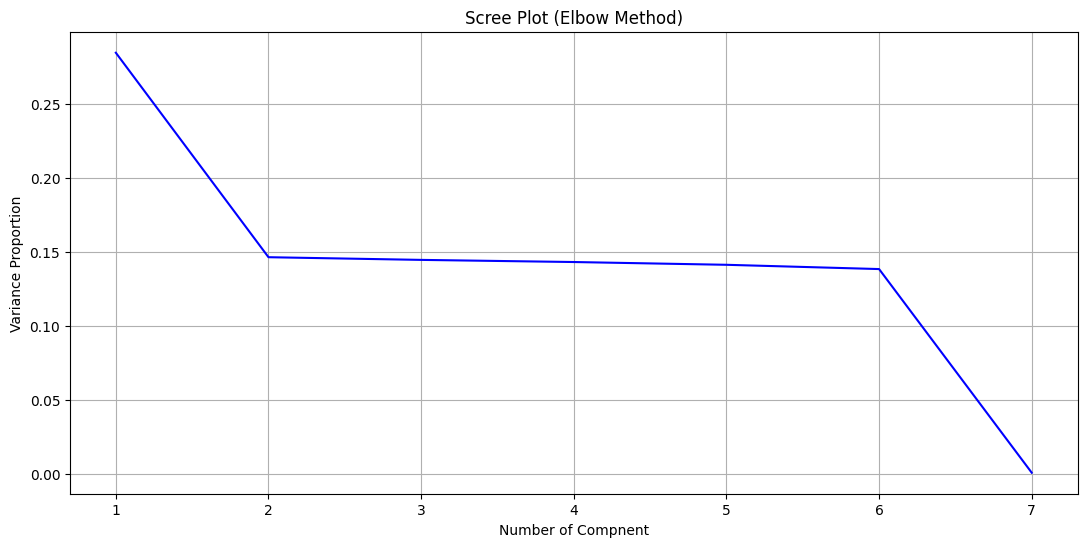

In [10]:
pcomp = np.arange(pca.n_components_) + 1 # create a numpy array starting at one as opposed to 0

plt.figure(figsize = (13,6))
plt.plot(pcomp,exp_var,'b-')
plt.title('Scree Plot (Elbow Method)')
plt.xlabel('Number of Compnent')
plt.ylabel('Variance Proportion')
plt.grid()
plt.show()

In [11]:
# Interperet Results 
print(dict(zip(['PC1','PC2','PC3','PC4'], pcomp)))

{'PC1': 1, 'PC2': 2, 'PC3': 3, 'PC4': 4}


In [21]:
pca.explained_variance_[:2]

array([1.99341957, 1.02577429])

In [22]:
total_variance = np.sum(pcomp[:2]/np.sum(pcomp))
total_variance

0.10714285714285714

In [14]:
#Kaiser Criterion
var = pca.explained_variance_
var

array([1.99341957, 1.02577429, 1.01309161, 1.0029618 , 0.98987001,
       0.96965194, 0.00593084])

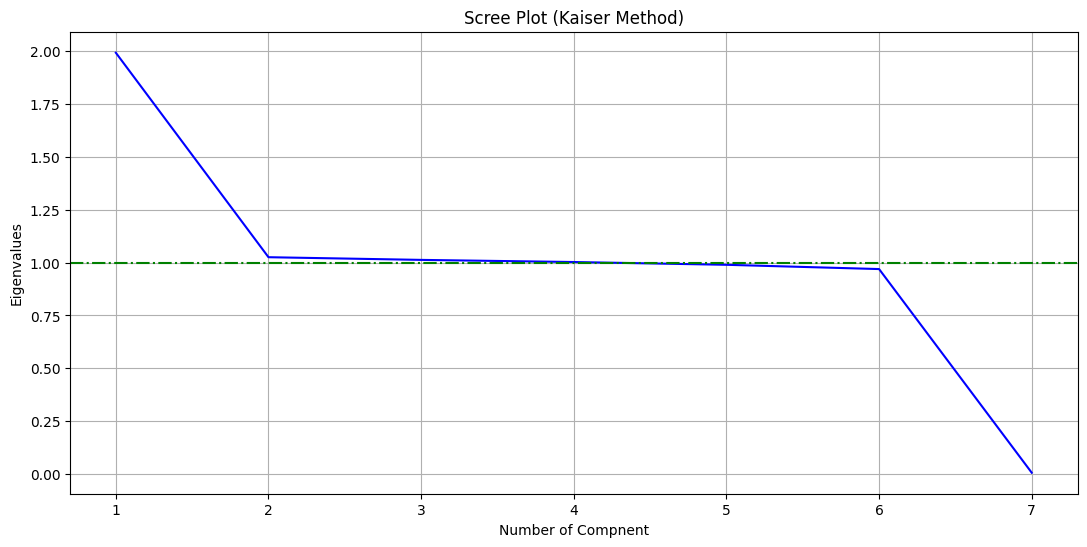

In [15]:
plt.figure(figsize=(13,6))
plt.plot(pcomp, var,'b')
plt.title('Scree Plot (Kaiser Method)')
plt.xlabel('Number of Compnent')
plt.ylabel('Eigenvalues')
plt.axhline(y=1,color = 'g', linestyle = 'dashdot')
plt.grid()
plt.show()

In [18]:
pca.explained_variance_[:4]

array([1.99341957, 1.02577429, 1.01309161, 1.0029618 ])

In [20]:
total_variance = np.sum(pcomp[:4]/np.sum(pcomp))
total_variance

0.3571428571428571